# Mandatory part

## Part 1: Analysis of the Data Set

### Imports

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import pathlib

In [ ]:
path = pathlib.Path('./data/images/')

In [ ]:
def count_images(directory):
    subdirs = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]
    counts = {}
    for subdir in subdirs:
        subdir_path = os.path.join(directory, subdir)
        image_files = [f for f in os.listdir(subdir_path) if Image.open(os.path.join(subdir_path, f)).format in ['JPEG', 'PNG']]
        counts[subdir] = len(image_files)
    return counts

def plot_charts(counts, directory_name):
    labels = list(counts.keys())
    sizes = list(counts.values())

    # Pie chart
    plt.figure(figsize=[10, 10])
    cmap = plt.get_cmap("tab20c")
    colors = cmap(np.arange(len(labels)) % cmap.N)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title(f'Pie chart for {directory_name}')
    plt.savefig(f'{directory_name}_pie_chart.png')
    plt.show()

    # Bar chart
    plt.figure(figsize=[10, 10])
    sns.barplot(y=labels, x=sizes, orient='h', palette='viridis')
    plt.title(f'Bar chart for {directory_name}')
    plt.xlabel('Number of Images')
    plt.ylabel('Condition')
    plt.grid(True)
    plt.savefig(f'{directory_name}_bar_chart.png')
    plt.show()

    # Histogram
    plt.figure(figsize=[10, 10])
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
    plt.bar(labels, sizes, color=colors)
    plt.title(f'Bar chart for {directory_name}')
    plt.xlabel('Condition')
    plt.ylabel('Number of Images')
    plt.savefig(f'{directory_name}_bar_chart.png')
    plt.show()


# if __name__ == "__main__":
#     import sys
#     directory = sys.argv[1]
#     directory_name = os.path.basename(directory)
#     counts = count_images(directory)
#     plot_charts(counts, directory_name)

In [ ]:
directory = path
directory_name = os.path.basename(directory)
counts = count_images(directory)
counts, directory_name

In [ ]:
plot_charts(counts, directory_name)

## Part 2: Data augmentation

### Imports

In [ ]:
from torchvision import transforms
import shutil

In [ ]:
from pathlib import Path
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

def augment_and_save(image_path):
    img_path = Path(image_path)
    output_dir = img_path.parent/'augmented'
    os.makedirs(output_dir, exist_ok=True)
    image = Image.open(image_path)
    filename = img_path.stem

    augmentations = {
        'hflip': transforms.RandomHorizontalFlip(p=1),
        'vflip': transforms.RandomVerticalFlip(p=1),
        'rotate': transforms.RandomRotation(30),
        'shear': transforms.RandomAffine(degrees=0, shear=20),
        'crop': transforms.RandomCrop((200, 200)),
        'colorjitter': transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
    }

    fig, axs = plt.subplots(1, 7, figsize=(18, 8))

    axs[0].imshow(image)
    axs[0].set_title('ORIGINAL')
    axs[0].axis('off')

    for ax, (aug_name, augmentation) in zip(axs[1:], augmentations.items()):
        transformed_image = augmentation(image)
        transformed_image.save(output_dir / f'{filename}_{aug_name.upper()}.png')
        
        ax.imshow(transformed_image)
        ax.set_title(aug_name.upper())
        ax.axis('off')

    fig.tight_layout()
    plt.show()


# if __name__ == "__main__":
#     image_path = sys.argv[1]
#     output_dir = sys.argv[2]
#     os.makedirs(output_dir, exist_ok=True)
#     augment_and_save(image_path, output_dir)


In [ ]:
image_path = path/'Apple_scab'/'image (113).JPG'
augment_and_save(image_path)

## Part 3: Image Transformation

In [1]:
from plantcv import plantcv as pcv
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# PlantCV adjustable global parameters
pcv.params.debug = "plot"
pcv.params.text_size = 20
pcv.params.text_thickness = 10
pcv.params.line_thickness = 14
# Adjust plot sizes
pcv.params.dpi = 125

In [2]:
image_path = "data/images/Apple_Black_rot/image (10).JPG"
image = cv2.imread(image_path)
np.array(image).shape

(256, 256, 3)

### 1. Original Image: Display the original image.

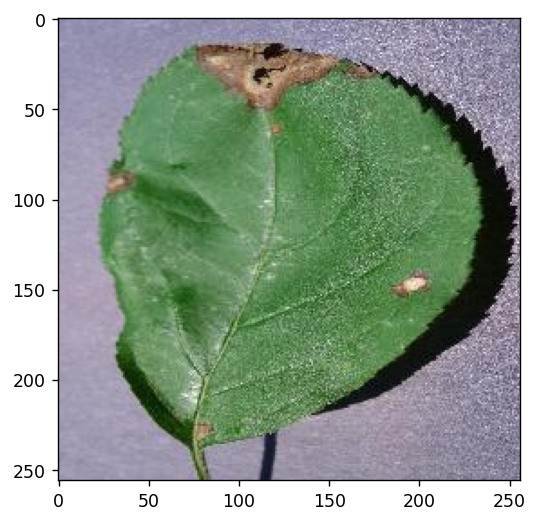

In [3]:
img, _, _ = pcv.readimage(image_path)

### 2. Gaussian Blur: Apply a Gaussian blur to smooth the image.

In [4]:
import cv2
import numpy as np
import plantcv as pcv

# Load the image
image_path = "data/images/Apple_Black_rot/image (10).JPG"
original_img = cv2.imread(image_path)

# Since the original image contains multiple sub-images, we will need to crop the original image out
# We assume that the original image is located in the top left
# We need to define the region of interest (ROI) for the original image
# This is a rough estimation and would need to be adjusted based on the actual positions

# Defining ROI coordinates for the original image
# This will depend on the position of the original image in the uploaded screenshot
# For the purpose of this code, let's assume the original image is at the top-left of the screenshot
# and has a size of 250x250 pixels
roi = (0, 0, 250, 250)

# Crop the original image
original_image = original_img[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]]

# Convert to grayscale
gray_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Create a binary mask where white represents the plant material
_, mask = cv2.threshold(blur_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Identify objects
# For PlantCV, a connected components analysis is used to identify individual plant objects
# PlantCV has a function `pcv.find_objects` that will find objects
# We need a clean mask so we can use morphological operations to clean it up
kernel = np.ones((5,5), np.uint8)
clean_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# _id_objects, obj_hierarchy = pcv.find_objects(original_image, clean_mask)

# Region of Interest (ROI) for objects
roi_objects, roi_obj_hierarchy = pcv.roi_objects(original_image, 'partial', roi, id_objects, obj_hierarchy)

# Analyze object
# PlantCV has a function `pcv.analyze_object` that can be used to analyze the properties of detected objects
# This will typically include area, color, and other morphological characteristics
# The function requires a single object, we need to loop through our objects if there are multiple
# We will take the first object for demonstration purposes
obj_contour = roi_objects[0]
analyze_img = pcv.analyze_object(original_image, obj_contour, obj_hierarchy)

# Pseudolandmarks
# PlantCV can create pseudolandmarks which are points of interest on the object that can be used for further analysis
# This includes points such as the center of mass, the tip, the base, and others depending on the object
# PlantCV's `pcv.x_axis_pseudolandmarks` and `pcv.y_axis_pseudolandmarks` functions are used for this
# These functions return images with the pseudolandmarks plotted
landmark_img = pcv.x_axis_pseudolandmarks(original_image, obj_contour, obj_hierarchy)
landmark_img = pcv.y_axis_pseudolandmarks(landmark_img, obj_contour, obj_hierarchy)

# Since PlantCV functions typically display images using matplotlib inside the functions and do not return the image
# we need to save the images to file if we want to display them outside of the function
# We will save the processed images to disk and then display them
cv2.imwrite('data/original_image.jpg', original_image)
cv2.imwrite('data/blur_img.jpg', blur_img)
cv2.imwrite('data/mask.jpg', mask)
cv2.imwrite('data/roi_objects.jpg', roi_objects)
# cv2.imwrite('data/analyze_img.jpg', analyze_img)
cv2.imwrite('data/landmark_img.jpg', landmark_img)

# Output the file paths to the saved images
output_files = {
    'original_image': 'data/original_image.jpg',
    'blur_img': 'data/blur_img.jpg',
    'mask': 'data/mask.jpg',
    'roi_objects': 'data/roi_objects.jpg',
    'analyze_img': 'data/analyze_img.jpg',
    'landmark_img': 'data/landmark_img.jpg'
}

output_files

AttributeError: module 'plantcv' has no attribute 'roi_objects'

### 3.  Mask Creation: Create a mask to isolate the leaf.

###  4. Region of Interest (ROI) Objects: Identify and mark the region of interest in the image.

### 5. Analyze Object: Analyze characteristics of the leaf such as shape, size, and color.

### 6. Pseudolandmarks: Determine key points on the leaf for further analysis.

### 7. Color Histogram: Generate a histogram to represent the color distribution of the leaf.

In [ ]:
def process_image(image_path, output_dir):
    # Read the image
    image = cv2.imread(image_path)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Convert to grayscale for thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a binary mask
    _, mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

    # Identify ROI objects
    roi = pcv.roi.rectangle(img=image, x=0, y=0, h=250, w=250)

    # Analyze object
    # analysis = pcv.analyze. (img=image, obj=roi, mask=mask)


    # Pseudolandmarks
    # landmarks = pcv.pseudolandmarks(img=image, obj=roi, mask=mask)

    # Color histogram
    # color_hist = pcv.visualize.color_histogram(img=image, mask=mask)

    # Save transformations
    cv2.imwrite(os.path.join(output_dir, 'Original.jpg'), image)
    cv2.imwrite(os.path.join(output_dir, 'Gaussian_Blur.jpg'), blurred)
    cv2.imwrite(os.path.join(output_dir, 'Mask.jpg'), mask)
    cv2.imwrite(os.path.join(output_dir, 'ROI_Objects.jpg'), roi)
    # cv2.imwrite(os.path.join(output_dir, 'Analyze_Object.jpg'), analysis)
    # cv2.imwrite(os.path.join(output_dir, 'Pseudolandmarks.jpg'), landmarks)
    # color_hist.savefig(os.path.join(output_dir, 'Color_Histogram.jpg'))

def process_directory(directory_path, output_dir):
    # Process each image in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            process_image(image_path, output_dir)

def main(input_path):
    # Check if the input path is a directory or a single file
    if os.path.isdir(input_path):
        output_dir = os.path.join(input_path, 'processed_images')
        os.makedirs(output_dir, exist_ok=True)
        process_directory(input_path, output_dir)
    elif os.path.isfile(input_path):
        output_dir = os.path.dirname(input_path)
        process_image(input_path, output_dir)
    else:
        print("Invalid input path")

In [ ]:
main(image_path)

## Part 4: Classification

In [ ]:
import torch
import miniai
from torch import nn
from torch import optim
from miniai.training import accuracy

In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import os

class ImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform

        self.image_paths = []
        self.labels = []
        self.label_to_int = {}

        label_int = 0
        for label in os.listdir(directory):
            label_dir = os.path.join(directory, label)
            if os.path.isdir(label_dir):
                if label not in self.label_to_int:
                    self.label_to_int[label] = label_int
                    label_int += 1
                for image_name in os.listdir(label_dir):
                    self.image_paths.append(os.path.join(label_dir, image_name))
                    self.labels.append(self.label_to_int[label])
        print(self.label_to_int)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label


In [ ]:
from torch.utils.data import DataLoader

data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, shear=10, scale=(0.8,1.2)),
    transforms.RandomCrop((200, 200)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
from torch.utils.data import DataLoader, random_split

dataset = ImageDataset(directory=path, transform=data_transforms)

# Determine the lengths of the splits
train_len = int(0.8 * len(dataset))  # 80% of the dataset for training
val_len = len(dataset) - train_len  # The rest for validation

train_dataset, val_dataset = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
from torchvision import models
import torch.nn as nn

# Load the pre-trained model
model = models.resnet18(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

num_classes = 8  # Replace with the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to GPU if available
device = torch.device("mps")
model = model.to(device)

In [ ]:
xb, yb = next(iter(train_loader))

In [ ]:
xb, yb = xb.to(device), yb.to(device)

In [ ]:
batch_size=16
epochs = 10
loss_fn = nn.CrossEntropyLoss()
opt = optim.AdamW(model.fc.parameters(), lr=0.0005)
model

In [ ]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    recorder = {'tr_loss': [], 'val_loss': [], 'tr_acc': [], 'val_acc': []}
    losses = [[], []]
    fig, axs = plt.subplots(1, 1, figsize=(14, 7))
    p = display(fig, display_id=True)
    for epoch in range(epochs):
        model.train()
        train_tot_loss, train_tot_acc, t_count = 0.,0.,0
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

            n = len(xb)
            t_count += n

            train_tot_loss += loss.item()*n
            train_tot_acc  += accuracy(pred,yb).item()*n
            recorder['tr_loss'].append(loss.item())
            recorder['tr_acc'].append(accuracy(pred,yb).item())
            losses[0].append(loss.item())

        model.eval()
        val_tot_loss, val_tot_acc,v_count = 0.,0.,0
        with torch.no_grad():
            tot_loss,tot_acc,count = 0.,0.,0
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                n = len(xb)
                v_count += n
                val_tot_acc  += accuracy(pred,yb).item()*n
                val_tot_loss += loss_func(pred,yb).item()*n
                recorder['val_loss'].append(loss_func(pred,yb).item())
                recorder['val_acc'].append(accuracy(pred,yb).item())
                losses[1].append(loss_func(pred,yb).item())

            
        print(f"epoch {epoch + 1:02d}/{epochs:02d} - loss: {train_tot_loss/t_count:.4f} - acc: {train_tot_acc/t_count:.4f} - val_loss: {val_tot_loss/v_count:.4f} - val_acc: {val_tot_acc/v_count:.4f}")
        axs.plot(losses[0], c='#983FFF', linestyle='-',  label='Train Loss')
        axs.plot(losses[1], c='#FF9300', linestyle='--', label='Validation Loss')
        
        axs.grid(True)  # Enable gridlines
        
        axs.set_xlabel('Epochs')
        axs.set_ylabel('Loss')
        axs.set_title('Training and Validation Loss')
        
        
        plt.tight_layout()  # Adjust the plot to eliminate whitespace
        p.update(fig)
    return recorder

In [ ]:
recorder = fit(epochs, model, loss_fn, opt, train_loader, val_loader)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recorder['tr_loss'], label='Training Loss')
plt.plot(recorder['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recorder['tr_acc'], label='Training Accuracy')
plt.plot(recorder['val_acc'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [ ]:
# Unfreeze all layers
for param in model.parameters():
    param.requires_grad = True


In [ ]:
opt.param_groups[0]['lr'] = 1e-5

In [ ]:
recorder = fit(3, model, loss_fn, opt, train_loader, val_loader)